In [1]:
#OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision.
#Created by Intel in 1999, it is written in C++.

In [2]:
# So in general, the OpenCV library already contains many popular algorithms for computer vision, 
# including object detection and tracking algorithms that are already built into the library.

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2
print (cv2.__version__)

4.9.0


In [6]:
# pip install opencv-python --upgrade          - 4.8.0 versiyon da çalışmadı güncelleme ile çalıştı

## Kameradan çıkmak için q e basın

In [3]:
import cv2

video_path = 0
cap = cv2.VideoCapture(video_path)

while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame', frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

Bu kod, kullanıcının bilgisayarındaki bir kamera veya bir video dosyası ile OpenCV kütüphanesi aracılığıyla etkileşim kurmayı amaçlar.

İlk olarak, video_path değişkenine 0 atanır. Bu, kullanıcının yerel kamerayı kullanacağı anlamına gelir. Alternatif olarak, video dosyasının tam yolunu belirtebilirsiniz.

cv2.VideoCapture() fonksiyonu, belirtilen video kaynağından (burada video_path) çerçeveleri yakalamak için bir VideoCapture nesnesi oluşturur. Bu nesne, kamerayı veya video dosyasını açmak için kullanılır.

cap.isOpened() fonksiyonu, VideoCapture nesnesinin açık olup olmadığını kontrol eder. Eğer açık ise, döngü içindeki kod bloğuna geçilir.

cap.read() fonksiyonu, bir sonraki kareyi okur ve ret ve frame değişkenlerine atanır. ret değeri, başarılı bir şekilde kare okunduğunu gösteren bir Boolean değerdir. frame değişkeni ise, okunan kareyi içerir.

Eğer kare başarıyla okunduysa, cv2.imshow() fonksiyonu, "Frame" adında bir pencere açar ve okunan kareyi pencereye gösterir. cv2.waitKey() fonksiyonu, kullanıcının klavyeden bir tuşa basmasını bekler. & 0xFF işlemi, tuşa basılan ASCII kodunu alır. Burada 'q' tuşuna basılması durumunda döngüden çıkılır.

Eğer kare başarıyla okunamazsa veya kullanıcı 'q' tuşuna basarsa, döngü sonlandırılır. cap.release() fonksiyonu, VideoCapture nesnesini serbest bırakır ve kamera veya video dosyası kullanım dışı kalır. cv2.destroyAllWindows() fonksiyonu, tüm açık penceleri kapatır.

OpenCV'de resimler genellikle BGR (mavi, yeşil, kırmızı) renk kanallarına sahip 3 kanallı bir matris olarak saklanır. Bu, piksel değerlerinin mavi, yeşil ve kırmızı renklerin yoğunluğunu içeren üç ayrı kanalda depolandığı anlamına gelir.

Bu nedenle, bir resimdeki her pikselin üç ayrı değeri (mavi, yeşil ve kırmızı) olacaktır. Ancak, birçok diğer programlama dillerinde, bu renk kanalları sırasıyla RGB olarak kullanılır. Bu nedenle, OpenCV'de resimleri işlerken, renk kanallarının BGR sırasına göre olduğunu unutmamak önemlidir.

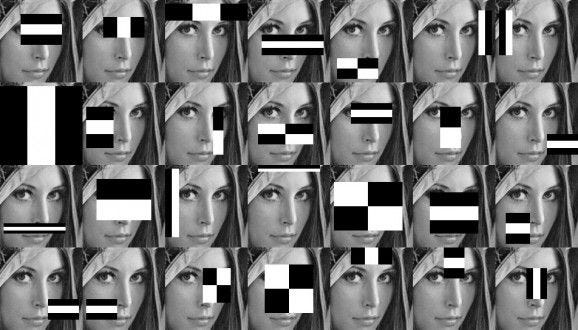

## Face Detection

"haarcascade-frontalface-default.xml," yüz tespiti (face detection) için kullanılan bir Haar Cascade sınıflandırıcısıdır. Haar Cascade, yüz, göz, gülümseme vb. nesneleri tespit etmek için yaygın olarak kullanılan bir nesne tanıma tekniğidir. Bu XML dosyası, özellikle bir kişinin yüzünün ön görünümünü algılamak için eğitilmiştir.

"haarcascade-frontalface-default.xml" dosyası, yüz tespiti için önceden eğitilmiş bir Haar Cascade sınıflandırıcısıdır. Bu dosya, genellikle Python'un OpenCV kütüphanesi veya benzeri görüntü işleme kütüphaneleri kullanılarak yüz tespiti uygulamalarında kullanılır. Örnek olarak, bu sınıflandırıcıyı kullanarak bir görüntüdeki yüzleri tespit edebilir ve işleyebilirsiniz.

In [7]:
import cv2
face_cascade = cv2.CascadeClassifier("haarcascade-frontalface-default.xml")
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if ret:
        frame = cv2.resize(frame, None, fx=1 / 2, fy=1 / 2, interpolation=cv2.INTER_AREA)
        image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        image_gray = cv2.equalizeHist(image_gray)
        faces = face_cascade.detectMultiScale(image_gray)
        for (x, y, w, h) in faces:
            # Draw ellipse around the face
            center = (x + w // 2, y + h // 2)
            image = cv2.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (0, 0, 255), 4)  # Kırmızı renk
        cv2.imshow('Capture - Face detection', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cv2.destroyAllWindows()

faces adlı bir döngü içerisinde yüzlerin koordinatlarını ve boyutlarını (x, y, w, h) içeren bir liste içerir. Yüz tespiti muhtemelen bir önceden eğitilmiş bir model veya algoritma tarafından gerçekleştirilmiştir.

Her yüzün merkezi (x + w // 2, y + h // 2) hesaplanır. Bu, yüzün merkezini temsil eden bir noktanın koordinatlarını verir.

Ardından, cv2.ellipse işlevi kullanılarak yüzün etrafında bir elips çizilir. Bu işlev, bir görüntüye şekil çizmeye ve bu çizimleri özelleştirmeye olanak tanır.

frame: Elipsin çizileceği görüntüdür.
center: Elipsin merkez koordinatlarıdır.
(w // 2, h // 2): Elipsin yarı eksen uzunluklarıdır. Bu, yüzün genişliği ve yüksekliğinin yarısıdır, bu nedenle yüzün tamamını saran bir elips çizmek için kullanılır.
0, 0, 360: Elipsin çiziminin başlangıç açısı, bitiş açısı ve çizim açısıdır. Burada 0 ile 360 derece arasında tam bir elips çizilir.
(255, 0, 255): Elipsin rengidir. Burada pembe renk kullanılmıştır.
4: Elipsin çizgi kalınlığıdır.
Sonuç olarak, bu kod parçası yüzleri bulur ve her bir yüzün etrafına bir pembe renkte bir elips çizer. Yüzleri belirginleştirmek veya işaretlemek için kullanılabilir. Bu, görüntü işleme uygulamalarında yüz tanıma veya yüz izleme için yaygın olarak kullanılan bir teknik olabilir.

In [9]:
face_cascade = cv2.CascadeClassifier("haarcascade-frontalface-default.xml")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if ret:
        frame = cv2.resize(frame, None, fx=1/2, fy=1/2, interpolation=cv2.INTER_AREA)

        image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        image_gray = cv2.equalizeHist(image_gray)

        faces = face_cascade.detectMultiScale(image_gray)

        for (x, y, w, h) in faces:
            # Draw rectangle around the face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 255), 4) #kare 

        cv2.imshow('Capture - Face detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

cv2.destroyAllWindows()


faces adlı bir döngü içerisinde yüzlerin koordinatlarını ve boyutlarını (x, y, w, h) içeren bir liste içerir. Bu yüz tespiti muhtemelen bir önceden eğitilmiş bir model veya algoritma tarafından gerçekleştirilmiştir.

Her tespit edilen yüz için bir dikdörtgen çizmek için cv2.rectangle işlevi kullanılır. Bu işlev, bir görüntü üzerine dikdörtgen çizmeye olanak tanır.

frame: Dikdörtgenin çizileceği görüntüdür.
(x, y): Dikdörtgenin sol üst köşesinin koordinatlarıdır (x, y).
(x+w, y+h): Dikdörtgenin sağ alt köşesinin koordinatlarıdır (x+w, y+h).
(255, 0, 255): Dikdörtgenin rengidir. Burada pembe renk kullanılmıştır.
4: Dikdörtgenin kenar kalınlığıdır.
Sonuç olarak, bu kod parçası, tespit edilen yüzlerin her birini bir dikdörtgen ile çevreler. Bu, yüzlerin konumlarını ve boyutlarını görsel olarak belirtmek için kullanılır. Yüz tanıma veya yüz izleme uygulamalarında sıklıkla kullanılan bir tekniktir.

### ÇERÇEVEYİ BÜYÜTMEK

In [10]:
face_cascade = cv2.CascadeClassifier("haarcascade-frontalface-default.xml")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if ret:
        frame = cv2.resize(frame, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

        image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        image_gray = cv2.equalizeHist(image_gray)

        faces = face_cascade.detectMultiScale(image_gray)

        for (x, y, w, h) in faces:
            # Draw rectangle around the face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 255), 4)

        cv2.imshow('Capture - Face detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

cv2.destroyAllWindows()


# EYE

In [11]:
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()

    if ret:
        frame = cv2.resize(frame, None, fx=1 / 2, fy=1 / 2, interpolation=cv2.INTER_AREA)

        image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        image_gray = cv2.equalizeHist(image_gray)

        eyes = eye_cascade.detectMultiScale(image_gray)

        for (x, y, w, h) in eyes:
            # Draw ellipse around the face
            center = (x + w // 2, y + h // 2)
            image = cv2.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)

        cv2.imshow('Capture - Eyesq detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

cv2.destroyAllWindows()

# SMILE

In [12]:
face_cascade = cv2.CascadeClassifier("haarcascade_smile.xml")
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if ret:
        frame = cv2.resize(frame, None, fx=1/2, fy=1/2, interpolation=cv2.INTER_AREA)

        image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        image_gray = cv2.equalizeHist(image_gray)

        faces = face_cascade.detectMultiScale(image_gray, minNeighbors=80)  # Hassasiyeti düşürmek için minNeighbors değerini ayarlayın

        for (x, y, w, h) in faces:
            # Draw rectangle around the face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 255), 4)

        cv2.imshow('Capture - Face detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

cv2.destroyAllWindows()
